In [16]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv1D,MaxPooling1D,UpSampling1D,Flatten,add
from tensorflow.keras.callbacks import ModelCheckpoint

from AD_tools import * # specifically need training()

In [17]:
theory_1st = np.loadtxt("data/theory_1st.txt")
theory_2nd = np.loadtxt("data/theory_2nd.txt")
theorycolor="grey"

In [18]:
plt.rcParams.update({
    'figure.figsize': (6,5),
    'font.size': 16,
    })

In [19]:
name = "3-0"

In [20]:
data = np.loadtxt("data/dataD10s_cut03.txt")
data.shape

(400, 43)

In [21]:
xx, yy = data[:,0], data[:,1]

In [22]:
sorter = np.argsort(xx)
xx, yy = xx[sorter], yy[sorter]

In [23]:
x_data = data[:,3:][sorter]

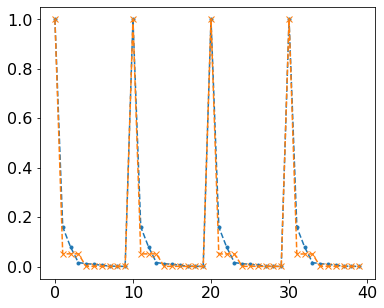

In [24]:
plt.plot(x_data[0],".--")
plt.plot(x_data[-1],"x--")

In [25]:
x_test = x_data.reshape((x_data.shape[0],4,10)).transpose((0,2,1))
x_test.shape

(400, 10, 4)

In [26]:
x_test = x_test[:,1:,:]
x_test.shape

(400, 9, 4)

In [27]:
shape_ = x_test.shape[1:]

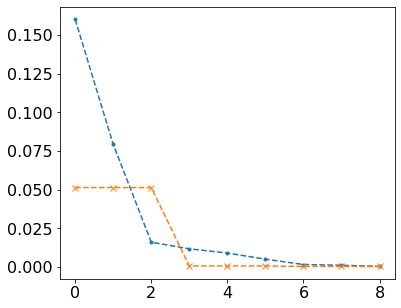

In [28]:
plt.plot(x_test[0,:,0],".--")
plt.plot(x_test[-1,:,0],"x--")

In [29]:
def picker(fillings, fmin, fmax):
    fillings = np.array(fillings)
    pickle = np.where((fillings>= fmin) & (fillings <= fmax))
    return pickle, fillings[pickle]

In [30]:
rate=0.2 # Dropout percentage
bottleneck = 50 # latent space dimension, does not make great differences
fully = True

In [31]:
def cnnx(loss,optimizer,activation0,activation,x_shape,dim1=(16,(3,)),dim2=(16,(3,)), fully=False):
    """ 
    Pretty Standard Convolutional Autoencoder with a fully-connected latent space
    activation0: Activations "inside" the CAE
    activation: Last activation (important depending on the range of the pixel values)
    """
    in_dim = x_shape
    input_img = Input(shape=in_dim)
   
    #x1 = Conv1D(*dim1, activation=activation0, padding='same')(input_img)
    #x2 = MaxPooling1D((2,), padding='same')(x1)
    #x2 = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    #x3 = MaxPooling1D((2,), padding='same')(x2)
    #encoded = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    
    encoded = Flatten()(input_img)
    encoded = Dense(units=100,activation=activation0)(encoded)
    encoded = tf.keras.layers.Dropout(rate)(encoded)
    encoded = Dense(units=25,activation=activation0)(encoded)
    
    y = Dense(units=100,activation=activation0)(encoded)
    y = tf.keras.layers.Dropout(rate)(y)

    #y=UpSampling1D(2)(encoded)
    #y=Conv1D(*dim1, activation=activation0, padding='same')(y)
    #y=UpSampling1D(2)(y)
    decoded = Dense(np.prod(in_dim), activation=activation)(y)
    decoded = tf.keras.layers.Reshape(in_dim)(decoded)
    

    cnn = Model(input_img, decoded)
    cnn.compile(loss=loss,optimizer=optimizer)
    return cnn

In [32]:
# Show Network architecture
cnn = cnnx("mse","adam","linear","relu",x_shape=(10,4))
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 4)]           0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0     

In [33]:
def create_out(cnn1):
    """
    Creates (dim_freq, dim_phase) matrix of the output loss and the standard deviation
    """
    y_test = cnn1.predict(x_test)
    return 100*eval_loss(x_test,y_test,norm=norm2)/eval_loss(x_test,0*x_test,norm=norm2)

In [34]:
train1s = [(0,0.1),(0,0.3),(0,0.5),(0,0.7),(3.8,np.max(xx)),(3.5,np.max(xx)),(3.2,np.max(xx)),(2.8,np.max(xx)),(1.5,1.7),(1.4,1.8),(1.3,1.9)]

In [35]:
for i in range(len(x_test)):
    x_test[i] = x_test[i]/np.mean(x_test[i])

# Systematic approach

In [36]:
cnns = [None]*len(train1s)
outs = [None]*len(train1s)

10 400 4000
Epoch 1/400
1/1 [==============================] - 1s 755ms/step - loss: 3.9859 - val_loss: 3.7491
Epoch 2/400
1/1 [==============================] - 0s 38ms/step - loss: 3.7340 - val_loss: 3.5822
Epoch 3/400
1/1 [==============================] - 0s 31ms/step - loss: 3.6550 - val_loss: 3.4311
Epoch 4/400
1/1 [==============================] - 0s 29ms/step - loss: 3.4684 - val_loss: 3.2851
Epoch 5/400
1/1 [==============================] - 0s 31ms/step - loss: 3.3292 - val_loss: 3.1449
Epoch 6/400
1/1 [==============================] - 0s 37ms/step - loss: 3.3319 - val_loss: 3.0152
Epoch 7/400
1/1 [==============================] - 0s 32ms/step - loss: 3.0714 - val_loss: 2.8909
Epoch 8/400
1/1 [==============================] - 0s 30ms/step - loss: 2.8748 - val_loss: 2.7605
Epoch 9/400
1/1 [==============================] - 0s 34ms/step - loss: 2.8698 - val_loss: 2.6172
Epoch 10/400
1/1 [==============================] - 0s 29ms/step - loss: 2.7691 - val_loss: 2.4718
Epoch 

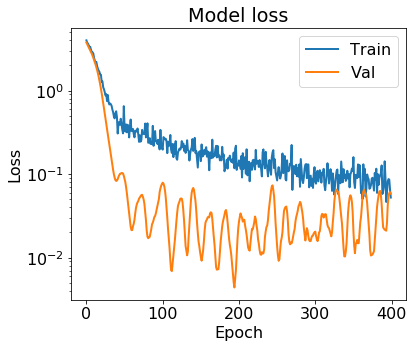

30 133 3990
Epoch 1/133
2/2 [==============================] - 0s 135ms/step - loss: 3.2913 - val_loss: 3.0191
Epoch 2/133
2/2 [==============================] - 0s 34ms/step - loss: 3.0827 - val_loss: 2.7787
Epoch 3/133
2/2 [==============================] - 0s 34ms/step - loss: 2.8390 - val_loss: 2.5280
Epoch 4/133
2/2 [==============================] - 0s 31ms/step - loss: 2.5495 - val_loss: 2.2511
Epoch 5/133
2/2 [==============================] - 0s 36ms/step - loss: 2.2553 - val_loss: 1.9543
Epoch 6/133
2/2 [==============================] - 0s 35ms/step - loss: 2.0485 - val_loss: 1.6490
Epoch 7/133
2/2 [==============================] - 0s 33ms/step - loss: 1.7854 - val_loss: 1.3421
Epoch 8/133
2/2 [==============================] - 0s 30ms/step - loss: 1.5083 - val_loss: 1.0487
Epoch 9/133
2/2 [==============================] - 0s 120ms/step - loss: 1.2717 - val_loss: 0.7889
Epoch 10/133
2/2 [==============================] - 0s 30ms/step - loss: 1.0244 - val_loss: 0.5643
Epoch

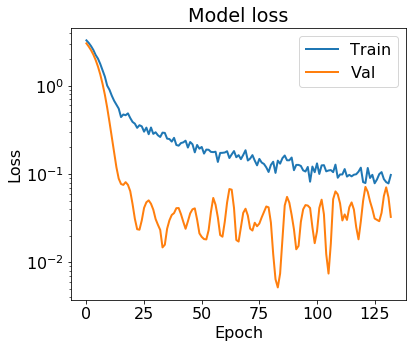

50 80 4000
Epoch 1/80
4/4 [==============================] - 1s 48ms/step - loss: 3.6349 - val_loss: 3.3030
Epoch 2/80
4/4 [==============================] - 0s 15ms/step - loss: 3.2618 - val_loss: 2.9245
Epoch 3/80
4/4 [==============================] - 0s 12ms/step - loss: 2.8972 - val_loss: 2.5133
Epoch 4/80
4/4 [==============================] - 0s 10ms/step - loss: 2.4275 - val_loss: 1.9975
Epoch 5/80
4/4 [==============================] - 0s 10ms/step - loss: 2.0147 - val_loss: 1.3770
Epoch 6/80
4/4 [==============================] - 0s 43ms/step - loss: 1.5440 - val_loss: 0.7589
Epoch 7/80
4/4 [==============================] - 0s 14ms/step - loss: 0.9397 - val_loss: 0.2840
Epoch 8/80
4/4 [==============================] - 0s 12ms/step - loss: 0.6590 - val_loss: 0.0756
Epoch 9/80
4/4 [==============================] - 0s 15ms/step - loss: 0.6321 - val_loss: 0.0448
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.6253 - val_loss: 0.0362
Epoch 11/80
4/4 [=

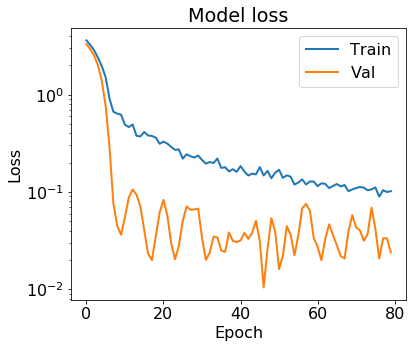

70 57 3990
Epoch 1/57
5/5 [==============================] - 0s 36ms/step - loss: 3.7594 - val_loss: 3.0557
Epoch 2/57
5/5 [==============================] - 0s 9ms/step - loss: 3.0681 - val_loss: 2.6275
Epoch 3/57
5/5 [==============================] - 0s 9ms/step - loss: 2.6178 - val_loss: 2.1322
Epoch 4/57
5/5 [==============================] - 0s 9ms/step - loss: 2.1216 - val_loss: 1.4927
Epoch 5/57
5/5 [==============================] - 0s 9ms/step - loss: 1.5555 - val_loss: 0.7754
Epoch 6/57
5/5 [==============================] - 0s 10ms/step - loss: 0.9995 - val_loss: 0.2934
Epoch 7/57
5/5 [==============================] - 0s 9ms/step - loss: 0.7534 - val_loss: 0.1034
Epoch 8/57
5/5 [==============================] - 0s 12ms/step - loss: 0.6567 - val_loss: 0.0594
Epoch 9/57
5/5 [==============================] - 0s 11ms/step - loss: 0.5517 - val_loss: 0.0809
Epoch 10/57
5/5 [==============================] - 0s 11ms/step - loss: 0.4935 - val_loss: 0.0943
Epoch 11/57
5/5 [======

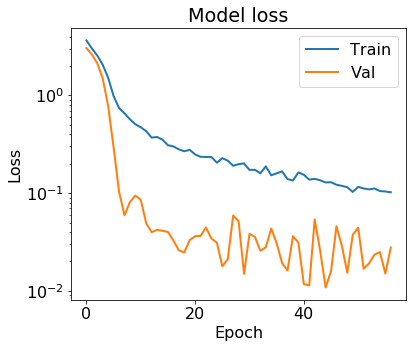

21 190 3990
Epoch 1/190
2/2 [==============================] - 0s 133ms/step - loss: 2.9400 - val_loss: 2.5721
Epoch 2/190
2/2 [==============================] - 0s 30ms/step - loss: 2.6860 - val_loss: 2.3900
Epoch 3/190
2/2 [==============================] - 0s 30ms/step - loss: 2.4693 - val_loss: 2.2538
Epoch 4/190
2/2 [==============================] - 0s 34ms/step - loss: 2.2831 - val_loss: 2.0945
Epoch 5/190
2/2 [==============================] - 0s 32ms/step - loss: 2.1347 - val_loss: 1.9173
Epoch 6/190
2/2 [==============================] - 0s 30ms/step - loss: 1.9473 - val_loss: 1.7187
Epoch 7/190
2/2 [==============================] - 0s 30ms/step - loss: 1.7948 - val_loss: 1.5072
Epoch 8/190
2/2 [==============================] - 0s 32ms/step - loss: 1.6002 - val_loss: 1.2889
Epoch 9/190
2/2 [==============================] - 0s 35ms/step - loss: 1.3430 - val_loss: 1.0745
Epoch 10/190
2/2 [==============================] - 0s 39ms/step - loss: 1.1856 - val_loss: 0.8735
Epoch 

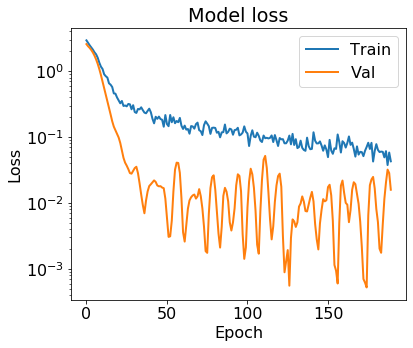

51 78 3978
Epoch 1/78
4/4 [==============================] - 0s 46ms/step - loss: 2.8503 - val_loss: 2.3869
Epoch 2/78
4/4 [==============================] - 0s 14ms/step - loss: 2.3600 - val_loss: 1.9495
Epoch 3/78
4/4 [==============================] - 0s 11ms/step - loss: 1.9624 - val_loss: 1.4651
Epoch 4/78
4/4 [==============================] - 0s 12ms/step - loss: 1.4533 - val_loss: 0.9247
Epoch 5/78
4/4 [==============================] - 0s 13ms/step - loss: 1.0288 - val_loss: 0.4227
Epoch 6/78
4/4 [==============================] - 0s 17ms/step - loss: 0.6095 - val_loss: 0.1155
Epoch 7/78
4/4 [==============================] - 0s 13ms/step - loss: 0.5580 - val_loss: 0.0407
Epoch 8/78
4/4 [==============================] - 0s 13ms/step - loss: 0.5272 - val_loss: 0.0252
Epoch 9/78
4/4 [==============================] - 0s 12ms/step - loss: 0.4365 - val_loss: 0.0397
Epoch 10/78
4/4 [==============================] - 0s 11ms/step - loss: 0.3709 - val_loss: 0.0651
Epoch 11/78
4/4 [=

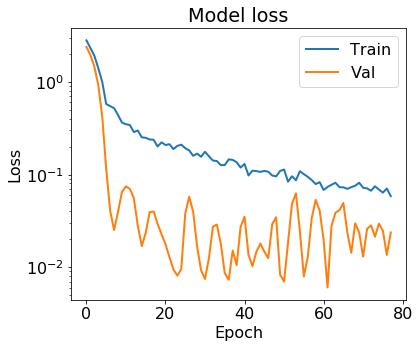

81 49 3969
Epoch 1/49
6/6 [==============================] - 0s 27ms/step - loss: 2.7632 - val_loss: 2.2357
Epoch 2/49
6/6 [==============================] - 0s 8ms/step - loss: 2.1106 - val_loss: 1.3356
Epoch 3/49
6/6 [==============================] - 0s 27ms/step - loss: 1.2665 - val_loss: 0.4559
Epoch 4/49
6/6 [==============================] - 0s 8ms/step - loss: 0.6736 - val_loss: 0.1281
Epoch 5/49
6/6 [==============================] - 0s 9ms/step - loss: 0.5951 - val_loss: 0.0478
Epoch 6/49
6/6 [==============================] - 0s 9ms/step - loss: 0.4426 - val_loss: 0.0987
Epoch 7/49
6/6 [==============================] - 0s 8ms/step - loss: 0.3828 - val_loss: 0.1121
Epoch 8/49
6/6 [==============================] - 0s 11ms/step - loss: 0.2863 - val_loss: 0.0422
Epoch 9/49
6/6 [==============================] - 0s 9ms/step - loss: 0.2759 - val_loss: 0.0268
Epoch 10/49
6/6 [==============================] - 0s 9ms/step - loss: 0.2548 - val_loss: 0.0231
Epoch 11/49
6/6 [========

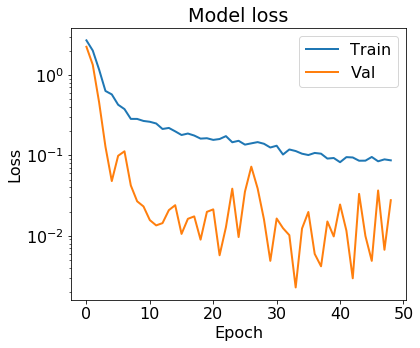

121 33 3993
Epoch 1/33
8/8 [==============================] - 1s 29ms/step - loss: 2.5628 - val_loss: 1.6982
Epoch 2/33
8/8 [==============================] - 0s 8ms/step - loss: 1.5389 - val_loss: 0.7256
Epoch 3/33
8/8 [==============================] - 0s 7ms/step - loss: 0.8212 - val_loss: 0.1690
Epoch 4/33
8/8 [==============================] - 0s 7ms/step - loss: 0.5097 - val_loss: 0.0350
Epoch 5/33
8/8 [==============================] - 0s 8ms/step - loss: 0.4069 - val_loss: 0.0566
Epoch 6/33
8/8 [==============================] - 0s 8ms/step - loss: 0.3453 - val_loss: 0.0197
Epoch 7/33
8/8 [==============================] - 0s 7ms/step - loss: 0.2839 - val_loss: 0.0191
Epoch 8/33
8/8 [==============================] - 0s 7ms/step - loss: 0.2517 - val_loss: 0.0185
Epoch 9/33
8/8 [==============================] - 0s 8ms/step - loss: 0.2340 - val_loss: 0.0238
Epoch 10/33
8/8 [==============================] - 0s 8ms/step - loss: 0.2106 - val_loss: 0.0180
Epoch 11/33
8/8 [=========

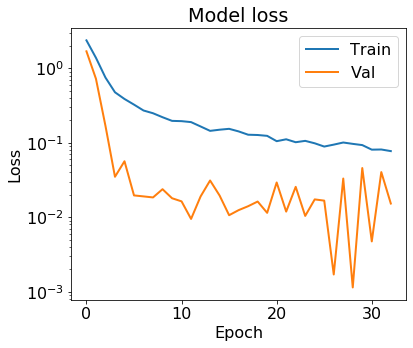

21 190 3990
Epoch 1/190
2/2 [==============================] - 0s 142ms/step - loss: 2.9754 - val_loss: 2.8188
Epoch 2/190
2/2 [==============================] - 0s 38ms/step - loss: 2.8366 - val_loss: 2.7521
Epoch 3/190
2/2 [==============================] - 0s 34ms/step - loss: 2.7818 - val_loss: 2.7039
Epoch 4/190
2/2 [==============================] - 0s 30ms/step - loss: 2.7406 - val_loss: 2.6693
Epoch 5/190
2/2 [==============================] - 0s 37ms/step - loss: 2.6669 - val_loss: 2.6293
Epoch 6/190
2/2 [==============================] - 0s 35ms/step - loss: 2.6060 - val_loss: 2.5712
Epoch 7/190
2/2 [==============================] - 0s 33ms/step - loss: 2.5517 - val_loss: 2.4960
Epoch 8/190
2/2 [==============================] - 0s 36ms/step - loss: 2.4547 - val_loss: 2.3961
Epoch 9/190
2/2 [==============================] - 0s 35ms/step - loss: 2.3448 - val_loss: 2.2668
Epoch 10/190
2/2 [==============================] - 0s 34ms/step - loss: 2.2782 - val_loss: 2.1113
Epoch 

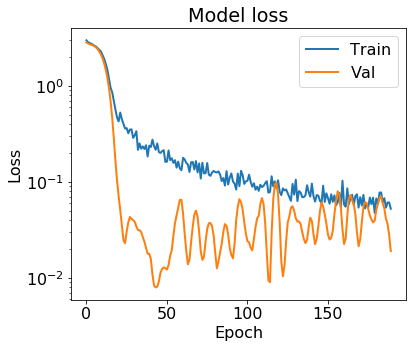

41 97 3977
Epoch 1/97
3/3 [==============================] - 0s 63ms/step - loss: 2.6764 - val_loss: 2.3293
Epoch 2/97
3/3 [==============================] - 0s 17ms/step - loss: 2.2931 - val_loss: 2.0148
Epoch 3/97
3/3 [==============================] - 0s 21ms/step - loss: 1.9794 - val_loss: 1.6690
Epoch 4/97
3/3 [==============================] - 0s 15ms/step - loss: 1.6140 - val_loss: 1.2869
Epoch 5/97
3/3 [==============================] - 0s 15ms/step - loss: 1.3365 - val_loss: 0.8881
Epoch 6/97
3/3 [==============================] - 0s 20ms/step - loss: 0.9350 - val_loss: 0.5380
Epoch 7/97
3/3 [==============================] - 0s 20ms/step - loss: 0.6839 - val_loss: 0.2901
Epoch 8/97
3/3 [==============================] - 0s 20ms/step - loss: 0.5517 - val_loss: 0.1553
Epoch 9/97
3/3 [==============================] - 0s 18ms/step - loss: 0.5114 - val_loss: 0.0814
Epoch 10/97
3/3 [==============================] - 0s 15ms/step - loss: 0.4422 - val_loss: 0.0428
Epoch 11/97
3/3 [=

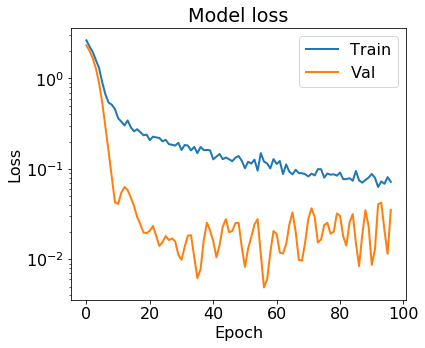

61 65 3965
Epoch 1/65
4/4 [==============================] - 1s 94ms/step - loss: 2.8972 - val_loss: 2.4074
Epoch 2/65
4/4 [==============================] - 0s 14ms/step - loss: 2.4213 - val_loss: 2.0246
Epoch 3/65
4/4 [==============================] - 0s 12ms/step - loss: 2.0057 - val_loss: 1.5845
Epoch 4/65
4/4 [==============================] - 0s 13ms/step - loss: 1.5961 - val_loss: 1.1056
Epoch 5/65
4/4 [==============================] - 0s 13ms/step - loss: 1.2060 - val_loss: 0.6559
Epoch 6/65
4/4 [==============================] - 0s 13ms/step - loss: 0.7974 - val_loss: 0.3109
Epoch 7/65
4/4 [==============================] - 0s 13ms/step - loss: 0.6280 - val_loss: 0.1254
Epoch 8/65
4/4 [==============================] - 0s 12ms/step - loss: 0.4840 - val_loss: 0.0464
Epoch 9/65
4/4 [==============================] - 0s 11ms/step - loss: 0.3868 - val_loss: 0.0458
Epoch 10/65
4/4 [==============================] - 0s 12ms/step - loss: 0.3837 - val_loss: 0.0694
Epoch 11/65
4/4 [=

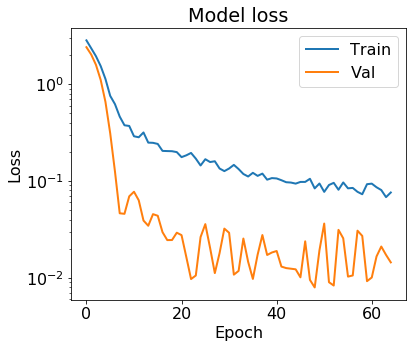

In [37]:
for i,train1 in enumerate(train1s):
    pickle, xx_train = picker(xx,*train1)
    x_train = x_test[pickle]
    num_epochs = 4000//len(x_train)
    print(len(x_train), num_epochs, len(x_train) * num_epochs)
    cnns[i] = training(x_train = x_train,choose_cnn = cnnx, name = name, provide_cnn = False,
                 load_prev= False, num_epochs = num_epochs,  verbose_val=1, batch_size = 16, shuffle=True, early=False,
                 loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam",
                 dim1=(16,(3,)), dim2=(16,(3,)), x_shape = shape_)
    outs[i] = create_out(cnns[i])

In [38]:
outs = np.array(outs)

In [39]:
np.savez("data_results/3-1_data",xx=xx,outs=outs,train1s=train1s)

In [40]:
temp = np.load("data_results/3-0_data.npz",allow_pickle=True)

In [41]:
lims1 = np.min(outs[[0,1,2,3]]),np.max(outs[[0,1,2,3]])
lims2 = np.min(outs[[4,5,6,7]]),np.max(outs[[4,5,6,7]])
lims3 = np.min(outs[[8,9,10]]),np.max(outs[[8,9,10]])
lims = [lims1,lims2,lims3]

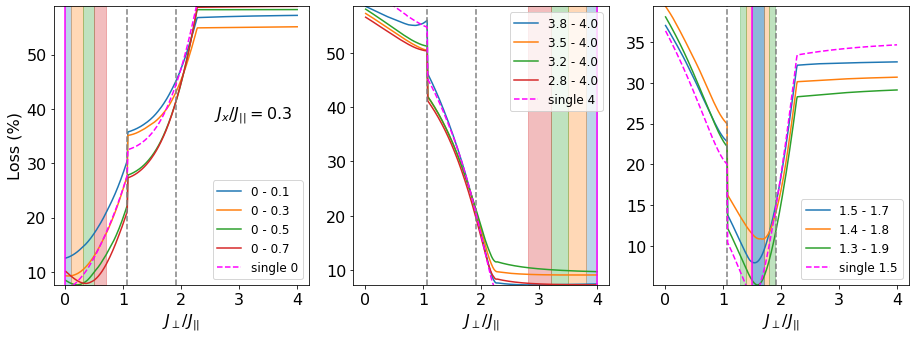

In [45]:
fig, axs = plt.subplots(ncols=3,figsize=(13,5),sharex=True)
color = ["tab:blue","tab:orange","tab:green","tab:red"]
picks = [[0,1,2,3],[4,5,6,7],[8,9,10,11]]
for i,train1 in enumerate(train1s):
    ax = axs[i//4]
    out = outs[i]
    ax.plot(xx,out,"-",label="{} - {}".format(*train1))
    plt.tight_layout()
x0,x1 = train1s[0]
axs[0].fill_between(*[(x0,x1)],*lims1,alpha=0.3,color=color[0])
for i in range(1,4):
    x0,x1 = x1,train1s[i][1]
    axs[0].fill_between(*[(x0,x1)],*lims1,alpha=0.3,color=color[i%4])
x0,x1 = train1s[4]
axs[1].fill_between(*[(x0,x1)],*lims2,alpha=0.3,color=color[0])
for i in range(5,8):
    x0,x1 = train1s[i][0],x0
    axs[1].fill_between(*[(x0,x1)],*lims2,alpha=0.3,color=color[i%4])
x0,x1 = train1s[8]
axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[0])
for i in range(9,11):
    x0,x1 = train1s[i][0],x0
    axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[i%4])
x0,x1 = train1s[8]
axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[0])
for i in range(9,11):
    x0,x1 = x1,train1s[i][1]
    axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[i%4])
for i,lim in enumerate([lims1,lims2,lims3]):
    axs[i].set_ylim(*lim)
    axs[i].plot([theory_1st[6,1]]*2,lims[i],"--",color="grey")
    axs[i].plot([theory_2nd[3,1]]*2,lims[i],"--",color="grey")

singlex = [0,4,1.5]
for i in range(3):
    axs[i].plot(temp["xx"],temp["outs"][i],"--",color="magenta",label="single {}".format(singlex[i]))
    axs[i].plot([singlex[i]]*2,lims[i],"-",color="magenta")
    axs[i].legend(fontsize=12)

#for i in range(0,3):
#    axs[i].text(-0.07,1.02,str(i+1) + ")", transform = axs[i].transAxes)
for i in range(3):
    axs[i].set_xlabel("$J_\perp/J_{{||}}$")
axs[0].text(0.63,0.6,'$J_x/J_{{||}} = 0.3$', transform = axs[0].transAxes)
axs[0].set_ylabel("Loss (%)")
plt.tight_layout()

plt.savefig("plots/" + name + ".png")
plt.savefig("plots/" + name + ".pdf")